<a href="https://colab.research.google.com/github/thelostnewspaper/fish_cryptogrphy/blob/main/experimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.backends import default_backend

In [ ]:
def generate_key(random_bits):
    password = random_bits[:32]  # Use the first 32 bits for the password
    salt = os.urandom(16)  # Generate a random salt
    kdf = PBKDF2HMAC(
        algorithm=hashes.SHA256(),
        length=32,  # Length of the key
        salt=salt,
        iterations=100000,
        backend=default_backend()
    )
    key = kdf.derive(password.encode())
    return key

In [ ]:
import cv2

# Load the video
video_path = '/content/videoplayback.mp4'  # Adjust the path accordingly
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error opening video file")
else:
    # Get the total number of frames
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    print(f'Total number of frames: {frame_count}')

    # Get the height and width of the video frames
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    print(f'Height: {height}, Width: {width}')

# Release the video capture object
cap.release()

Total number of frames: 7458.0
Height: 360.0, Width: 640.0


Total number of frames: 7458


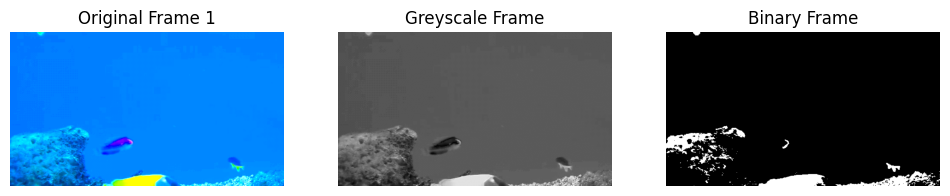

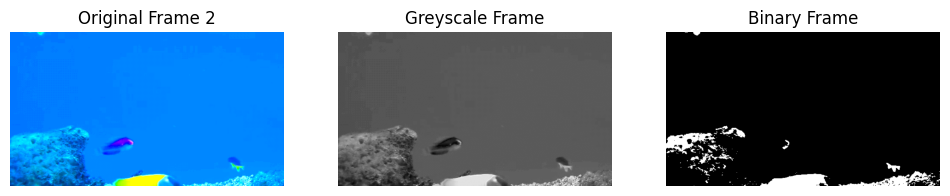

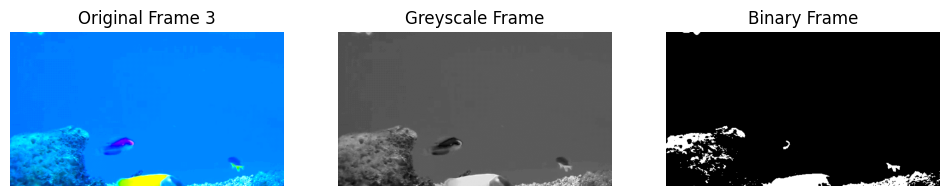

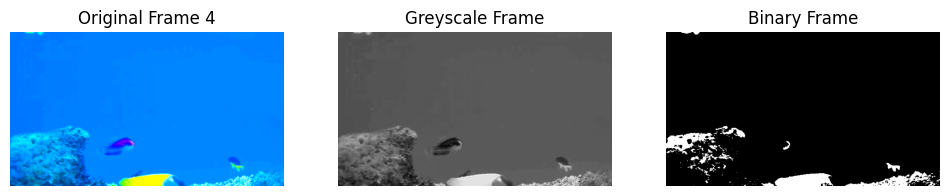

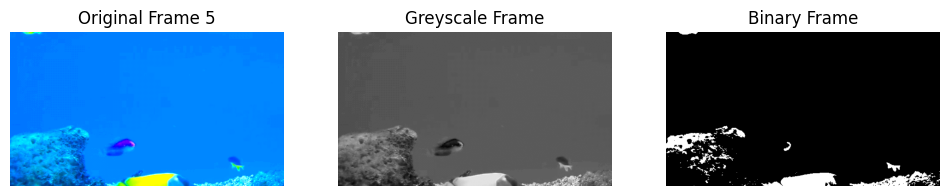

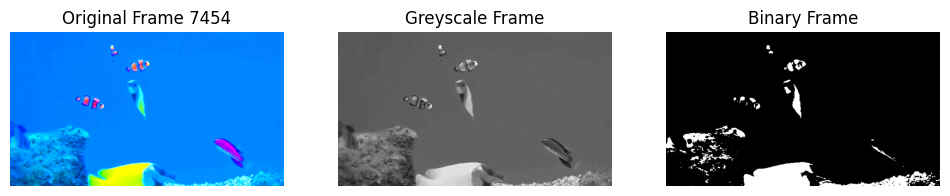

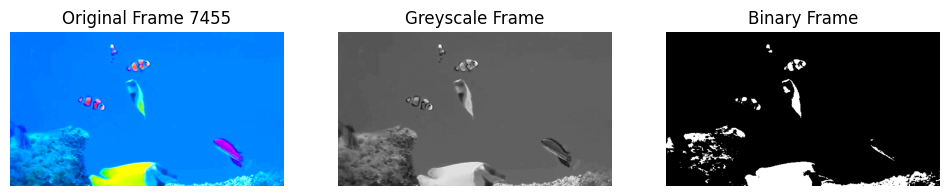

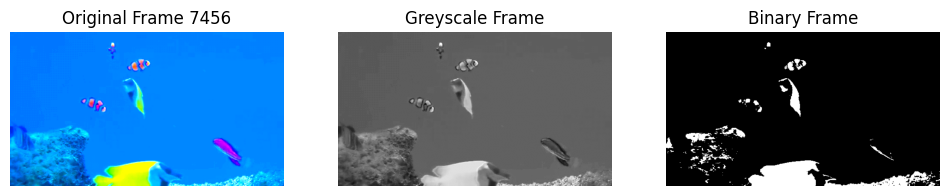

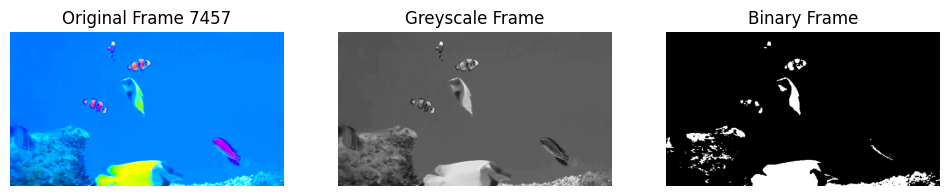

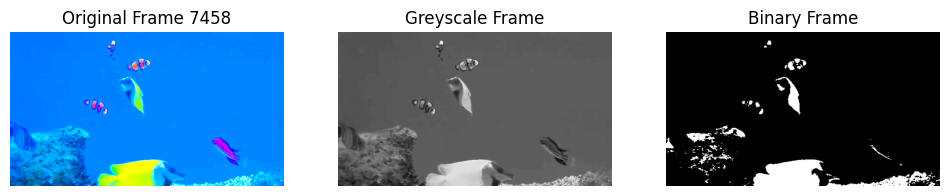

Generated Cryptographic Key: 38202b81cf382f921333a540843f7e253088a2cb96bf9f78a497388cc1dbe277
Ciphertext: 33fcfff5762d423e88cae3a57d5f1cc3905148be64e1966cd0
Decrypted Message: This is a secret message.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

def adjust_contrast(frame, alpha):
    """Adjust the contrast of the frame."""
    return cv2.convertScaleAbs(frame, alpha=alpha, beta=0)

def adjust_saturation(frame, saturation_scale):
    """Adjust the saturation of the frame."""
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    hsv_frame[..., 1] = np.clip(hsv_frame[..., 1] * saturation_scale, 0, 255)  # Scale saturation
    return cv2.cvtColor(hsv_frame, cv2.COLOR_HSV2BGR)

def process_video(video_path, num_frames_to_display=5, contrast_alpha=1.5, saturation_scale=1.5):
    cap = cv2.VideoCapture(video_path)

    # Check if the video opened successfully
    if not cap.isOpened():
        print("Error opening video file")
        return None

    randomness_list = []

    # Get the total number of frames
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f'Total number of frames: {n_frames}')

    # Display head frames
    for frame in range(num_frames_to_display):
        ret, frame_img = cap.read()
        if not ret:
            break

        # Adjust contrast and saturation
        frame_img = adjust_contrast(frame_img, contrast_alpha)
        frame_img = adjust_saturation(frame_img, saturation_scale)

        # Convert to greyscale
        grey_frame = cv2.cvtColor(frame_img, cv2.COLOR_BGR2GRAY)

        # Convert to binary
        _, binary_frame = cv2.threshold(grey_frame, 128, 255, cv2.THRESH_BINARY)

        # Flatten the binary frame to extract randomness
        randomness = binary_frame.flatten() // 255  # Convert to 0s and 1s
        randomness_list.append(randomness)

        # Visualize the frames
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(frame_img, cv2.COLOR_BGR2RGB))
        plt.title(f'Original Frame {frame + 1}')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(grey_frame, cmap='gray')
        plt.title('Greyscale Frame')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(binary_frame, cmap='gray')
        plt.title('Binary Frame')
        plt.axis('off')

        plt.show()

    # Move to the last few frames
    cap.set(cv2.CAP_PROP_POS_FRAMES, max(0, n_frames - num_frames_to_display))

    # Display tail frames
    for frame in range(num_frames_to_display):
        ret, frame_img = cap.read()
        if not ret:
            break

        # Adjust contrast and saturation
        frame_img = adjust_contrast(frame_img, contrast_alpha)
        frame_img = adjust_saturation(frame_img, saturation_scale)

        # Convert to greyscale
        grey_frame = cv2.cvtColor(frame_img, cv2.COLOR_BGR2GRAY)

        # Convert to binary
        _, binary_frame = cv2.threshold(grey_frame, 128, 255, cv2.THRESH_BINARY)

        # Flatten the binary frame to extract randomness
        randomness = binary_frame.flatten() // 255  # Convert to 0s and 1s
        randomness_list.append(randomness)

        # Visualize the frames
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(frame_img, cv2.COLOR_BGR2RGB))
        plt.title(f'Original Frame {n_frames - num_frames_to_display + frame + 1}')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(grey_frame, cmap='gray')
        plt.title('Greyscale Frame')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(binary_frame, cmap='gray')
        plt.title('Binary Frame')
        plt.axis('off')

        plt.show()

    cap.release()

    # Combine all randomness into a single array
    combined_randomness = np.concatenate(randomness_list)

    # Derive a cryptographic key from the randomness
    def derive_key(random_bits):
        password = random_bits[:32].tobytes()  # Convert to bytes
        salt = os.urandom(16)  # Generate a random salt
        kdf = PBKDF2HMAC(
            algorithm=hashes.SHA256(),
            length=32,  # Length of the key
            salt=salt,
            iterations=100000,
            backend=default_backend()
        )
        key = kdf.derive(password)
        return key

    # Derive the key
    key = derive_key(combined_randomness)
    print(f'Generated Cryptographic Key: {key.hex()}')

    # Encrypt a message using the derived key
    def encrypt_message(key, plaintext):
        iv = os.urandom(16)  # Generate a random IV
        cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
        encryptor = cipher.encryptor()
        ciphertext = encryptor.update(plaintext) + encryptor.finalize()
        return iv, ciphertext

    # Example usage
    plaintext = b'This is a secret message.'
    iv, ciphertext = encrypt_message(key, plaintext)
    print(f'Ciphertext: {ciphertext.hex()}')

    # Decrypt the message to validate the key
    def decrypt_message(key, iv, ciphertext):
        cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
        decryptor = cipher.decryptor()
        plaintext = decryptor.update(ciphertext) + decryptor.finalize()
        return plaintext

    # Decrypt the message
    decrypted_message = decrypt_message(key, iv, ciphertext)
    print(f'Decrypted Message: {decrypted_message.decode()}')

# Call the function with the video path
process_video("/content/videoplayback.mp4")

Proportion of 1s: 0.5002
Proportion of 0s: 0.4998
Frequency Test: PASSED
Shannon Entropy: 1.0000
Runs: 3688711, Expected Runs: 4915199.67, Z-Score: -1071.29, P-Value: 0.0000
Runs Test: FAILED


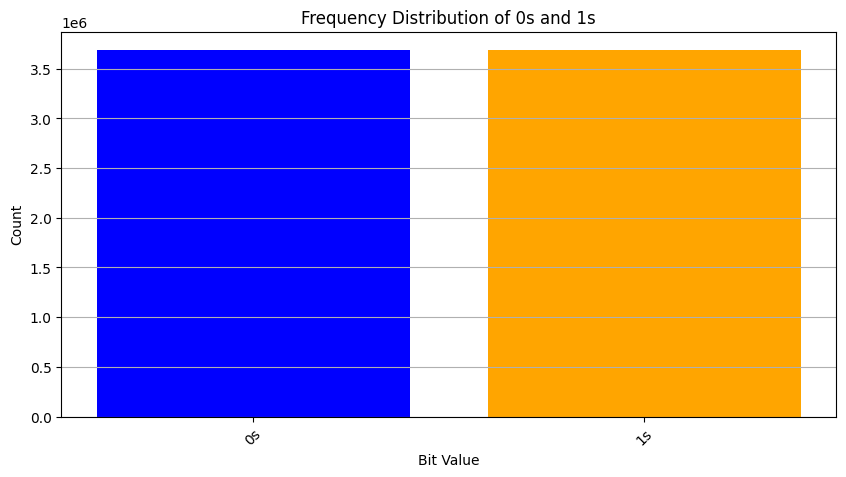

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming combined_randomness is your extracted bitstream
# For demonstration, let's create a random bitstream
# combined_randomness = np.random.randint(0, 2, size=7372800)  # Example bitstream

# Example bitstream for testing
combined_randomness = np.random.choice([0, 1], size=7372800, p=[0.5, 0.5])

# --- Randomness Validation ---

# Frequency Test
proportion_1s = np.mean(combined_randomness)
proportion_0s = 1 - proportion_1s

print(f'Proportion of 1s: {proportion_1s:.4f}')
print(f'Proportion of 0s: {proportion_0s:.4f}')

# Frequency Test Result
if 0.45 <= proportion_1s <= 0.55:
    print("Frequency Test: PASSED")
else:
    print("Frequency Test: FAILED")

# Shannon Entropy
entropy = -np.sum([p * np.log2(p) for p in [proportion_1s, proportion_0s] if p > 0])
print(f'Shannon Entropy: {entropy:.4f}')

# Runs Test
def runs_test(data):
    n = len(data)
    runs = 1
    for i in range(1, n):
        if data[i] != data[i - 1]:
            runs += 1
    expected_runs = (2 * n - 1) / 3
    variance_runs = (16 * n - 29) / 90
    z_score = (runs - expected_runs) / np.sqrt(variance_runs)
    p_value = 1 - stats.norm.cdf(abs(z_score))
    return runs, expected_runs, z_score, p_value

runs, expected_runs, z_score, p_value = runs_test(combined_randomness)
print(f'Runs: {runs}, Expected Runs: {expected_runs:.2f}, Z-Score: {z_score:.2f}, P-Value: {p_value:.4f}')

# Runs Test Result
if p_value < 0.01:
    print("Runs Test: FAILED")
else:
    print("Runs Test: PASSED")

# --- Plotting Frequency Distribution ---

# Count occurrences of 1s and 0s
counts = np.bincount(combined_randomness)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(['0s', '1s'], counts, color=['blue', 'orange'])
plt.title('Frequency Distribution of 0s and 1s')
plt.xlabel('Bit Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

# Function to derive a cryptographic key
def derive_key(password):
    salt = os.urandom(16)  # Generate a random salt
    kdf = PBKDF2HMAC(
        algorithm=hashes.SHA256(),
        length=32,  # Length of the key
        salt=salt,
        iterations=100000,
        backend=default_backend()
    )
    key = kdf.derive(password.encode())  # Derive the key from the password
    return key, salt

# Function to encrypt a message
def encrypt_message(key, plaintext):
    iv = os.urandom(16)  # Generate a random IV
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    ciphertext = encryptor.update(plaintext) + encryptor.finalize()
    return iv, ciphertext

# Function to decrypt a message
def decrypt_message(key, iv, ciphertext):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    decryptor = cipher.decryptor()
    plaintext = decryptor.update(ciphertext) + decryptor.finalize()
    return plaintext

# Interactive key generation
print("Welcome to the Interactive Cryptographic Tool!")

# Step 1: Get user input for password
password = input("Please enter a password to generate your cryptographic key: ")

# Step 2: Derive the key
key, salt = derive_key(password)
print(f"\nGenerated Key: {key.hex()}")
print(f"Salt (for storage): {salt.hex()}")

# Step 3: Ask if the user wants to proceed with encryption
proceed_encrypt = input("\nDo you want to proceed with encryption? (yes/no): ").strip().lower()
if proceed_encrypt == 'yes':
    plaintext = input("Please enter the plaintext message to encrypt: ").encode()
    iv, ciphertext = encrypt_message(key, plaintext)
    print(f"\nCiphertext: {ciphertext.hex()}")
    print(f"IV (for decryption): {iv.hex()}")

    # Step 4: Ask if the user wants to proceed with decryption
    proceed_decrypt = input("\nDo you want to proceed with decryption? (yes/no): ").strip().lower()
    if proceed_decrypt == 'yes':
        decrypted_message = decrypt_message(key, iv, ciphertext)
        print(f"\nDecrypted Message: {decrypted_message.decode()}")
    else:
        print("Decryption process aborted.")
else:
    print("Encryption process aborted.")

Welcome to the Interactive Cryptographic Tool!
Please enter a password to generate your cryptographic key: losty

Generated Key: 1bc46e33ad9b238a9c1788d8d385911b70c9e8e3850366faab59e5782582ec12
Salt (for storage): 5944a4396d869b69f109c40732ec1c25

Do you want to proceed with encryption? (yes/no): yes
Please enter the plaintext message to encrypt: i would like to encrypt 

Ciphertext: c451e7acfb82462f2b5eb7f083737e8e660ccd8566054c01
IV (for decryption): 90a6f611c1124a435c10ccebb0d34e54

Do you want to proceed with decryption? (yes/no): yes

Decrypted Message: i would like to encrypt 
